In [22]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-90.000, high=90.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
coordinates = list(lat_lngs)

In [4]:
# Import citipy module
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [6]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

In [ ]:
# Starting URL for Weather Map API Call
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print (url)

In [8]:
# Import the time library and the datetime odule from the datetime library
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginnng of the logging
print("Beginning Data Retrieval    ")
print("----------------------------")

# Create counters
record_count = 1
set_count = 1

Beginning Data Retrieval    
----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | aswan
Processing Record 4 of Set 1 | tallahassee
Processing Record 5 of Set 1 | kazalinsk
City not found. Skipping...
Processing Record 6 of Set 1 | vila franca do campo
Processing Record 7 of Set 1 | simoes
Processing Record 8 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 9 of Set 1 | atasu
Processing Record 10 of Set 1 | upernavik
Processing Record 11 of Set 1 | berlevag
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | aksarka
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | hobyo
Processing Record 18 of Set 1 | ponta do sol
Processing Record 19 of Set 1 | hamilton
Processing Record 20 of Set 1 | san joaquin
Processing Record 21 of Set 1 | talnakh
Processing Record 22 of Set 1 | codringt

In [11]:
print(len(city_data))

581


In [12]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Elizabeth,-33.9180,25.5701,69.31,73,75,4.00,ZA,2023-02-26 05:57:51
1,Aswan,24.0934,32.9070,56.50,44,0,5.75,EG,2023-02-26 05:57:52
2,Tallahassee,30.4383,-84.2807,65.86,95,0,3.44,US,2023-02-26 05:54:22
3,Vila Franca Do Campo,37.7167,-25.4333,61.21,94,100,19.13,PT,2023-02-26 05:57:53
4,Simoes,-7.5989,-40.8178,70.11,88,68,4.27,BR,2023-02-26 05:57:54
5,Atasu,48.6814,71.6433,8.94,85,45,3.91,KZ,2023-02-26 05:52:58
6,Upernavik,72.7868,-56.1549,-9.96,86,100,5.64,GL,2023-02-26 05:57:55
7,Berlevag,70.8578,29.0864,26.55,54,20,16.11,NO,2023-02-26 05:57:55
8,Ushuaia,-54.8000,-68.3000,44.26,81,0,17.27,AR,2023-02-26 05:55:31
9,Hermanus,-34.4187,19.2345,63.81,66,0,14.14,ZA,2023-02-26 05:57:56


In [13]:
# Reorder the columns in the DataFrame
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Elizabeth,ZA,2023-02-26 05:57:51,-33.9180,25.5701,69.31,73,75,4.00
1,Aswan,EG,2023-02-26 05:57:52,24.0934,32.9070,56.50,44,0,5.75
2,Tallahassee,US,2023-02-26 05:54:22,30.4383,-84.2807,65.86,95,0,3.44
3,Vila Franca Do Campo,PT,2023-02-26 05:57:53,37.7167,-25.4333,61.21,94,100,19.13
4,Simoes,BR,2023-02-26 05:57:54,-7.5989,-40.8178,70.11,88,68,4.27
5,Atasu,KZ,2023-02-26 05:52:58,48.6814,71.6433,8.94,85,45,3.91
6,Upernavik,GL,2023-02-26 05:57:55,72.7868,-56.1549,-9.96,86,100,5.64
7,Berlevag,NO,2023-02-26 05:57:55,70.8578,29.0864,26.55,54,20,16.11
8,Ushuaia,AR,2023-02-26 05:55:31,-54.8000,-68.3000,44.26,81,0,17.27
9,Hermanus,ZA,2023-02-26 05:57:56,-34.4187,19.2345,63.81,66,0,14.14


In [14]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

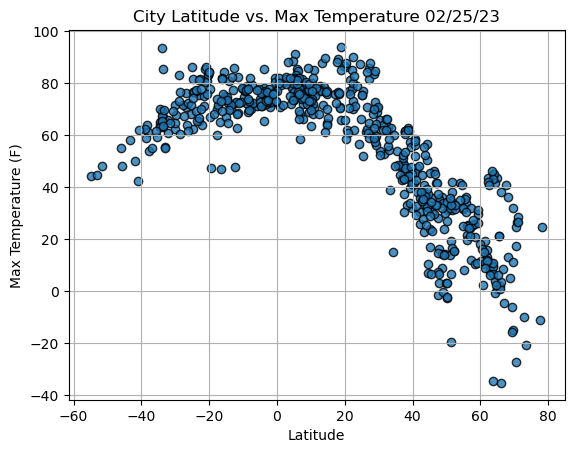

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()